<a href="https://colab.research.google.com/github/5213478/123/blob/main/ceshi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall tensorflow
!pip install tensorflow-gpu==1.15.2

Found existing installation: tensorflow 2.9.2
Uninstalling tensorflow-2.9.2:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.8/dist-packages/tensorflow-2.9.2.dist-info/*
    /usr/local/lib/python3.8/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.9.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==1.15.2 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8

In [ ]:
!pip uninstall h5py
!pip install h5py==2.10.0

Found existing installation: h5py 3.1.0
Uninstalling h5py-3.1.0:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/h5py-3.1.0.dist-info/*
    /usr/local/lib/python3.8/dist-packages/h5py.libs/libaec-9c9e97eb.so.0.0.10
    /usr/local/lib/python3.8/dist-packages/h5py.libs/libhdf5-00e8fae8.so.200.0.0
    /usr/local/lib/python3.8/dist-packages/h5py.libs/libhdf5_hl-383c339f.so.200.0.0
    /usr/local/lib/python3.8/dist-packages/h5py.libs/libsz-e7aa62f5.so.2.0.1
    /usr/local/lib/python3.8/dist-packages/h5py.libs/libz-eb09ad1d.so.1.2.3
    /usr/local/lib/python3.8/dist-packages/h5py/*
Proceed (y/n)? y
  Successfully uninstalled h5py-3.1.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 16.3 MB/s 


In [ ]:
!pip uninstall keras
!pip install keras==2.3.0

Found existing installation: keras 2.9.0
Uninstalling keras-2.9.0:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/keras-2.9.0.dist-info/*
    /usr/local/lib/python3.8/dist-packages/keras/*
Proceed (y/n)? n
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 377 kB 7.1 MB/s 
     |████████████████████████████████| 50 kB 7.4 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires keras<2.10.0,>=2.9.0rc0, but you have keras 2.3.0 which is incompatible.


In [ ]:
import h5py
print(h5py.__version__)

2.10.0


In [ ]:
import tensorflow
print(tensorflow.__version__)

2.2.0


In [ ]:
import keras
print(keras.__version__)

ImportError: ignored

In [ ]:
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/")
root_path = "/content/gdrive/My Drive/mod_rec/"

Mounted at /content/gdrive/


In [ ]:
#%reset
#%tensorflow_version 1.x
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import keras
import math
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Reshape, BatchNormalization, LSTM, Conv1D, MaxPooling1D, Conv2D, Input, Concatenate, Add, GRU, multiply, GlobalAveragePooling2D
from keras.layers.convolutional import Convolution1D ,Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.initializers import glorot_uniform
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import EarlyStopping, Callback, ModelCheckpoint
from scipy.interpolate import UnivariateSpline
from keras.utils import to_categorical
from sklearn import preprocessing
from keras.optimizers import Adam
from keras import regularizers

from tensorflow import squeeze
from keras.layers import Lambda

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [ ]:
EPOCHS = 100
NUM_CLASSES = 8
BATCH_SIZE = 1024
PATIENCE = 10

In [ ]:
#Normalisation is very important
def iq2ampphase(inphase, quad):
    amplitude = np.sqrt(np.square(inphase) + np.square(quad))
    amp_norm = np.linalg.norm(amplitude) #L2 norm
    amplitude = amplitude/amp_norm #normalise
    phase = np.arctan(np.divide(quad, inphase))
    phase = 2.*(phase - np.min(phase))/np.ptp(phase)-1 #rescale phase to range [-1, 1]
    return amplitude, phase

#convert array of multiple iq samples into array of multiple ampphase samples
def arr_iq2ap(X):
  X_ap = []
  for k in range(X.shape[0]):
    I = X[k][0,:]
    Q = X[k][1,:]
    amp, phase = iq2ampphase(I, Q)
    ap = np.array([amp, phase])
    X_ap.append(ap)
  X_ap = np.array(X_ap)
  return X_ap

In [ ]:
def generate_confusion_matrix(model, X,y, one_hot_transformer, batch_size):
    """
      y is the one hot encoded label vector passed to the model.evaluate
    """
    mod_to_idx = {mod:idx for idx,mod in enumerate(one_hot_transformer.classes_)} # use this to map modulation name to index
    y_hat = model.predict(X, batch_size)
    y_hat_onehot = np.zeros_like(y_hat)
    y_hat_onehot[np.arange(len(y_hat)), y_hat.argmax(1)] = 1 # convert the probabilities to one-hot format
    y_hat_mod = one_hot_transformer.inverse_transform(y_hat_onehot) # transform predictions to strings
    y_mod = one_hot_transformer.inverse_transform(y) # transform ground truth back to strings
    confusion_mat = np.zeros([NUM_CLASSES,NUM_CLASSES])

    acc = np.mean(y_mod == y_hat_mod)
    # fill in the confusion matrix
    for i in range(y.shape[0]):
        
        true_idx = mod_to_idx[y_mod[i]]
        pred_idx = mod_to_idx[y_hat_mod[i]]          
        confusion_mat[pred_idx,true_idx] += 1

    # normalize the matrix column wise
    for i in range(NUM_CLASSES):
        if np.sum(confusion_mat[:,i]) > 0:
          confusion_mat[:,i] /= np.sum(confusion_mat[:,i])
    
    return confusion_mat,acc

 
import seaborn as sns
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax, cmap=cmap); #annot=True to annotate cells
  
  plt.title(title)
  tick_marks = np.arange(len(labels))
  plt.xticks(tick_marks, labels, rotation=45)
  plt.yticks(tick_marks, labels)
  plt.tight_layout()
  plt.ylabel('Predicted label')
  plt.xlabel('True label')

In [ ]:
class ModelEvaluater:
  def __init__(self, model, X_train, y_train, X_val, y_val, X_test, y_test,
               labels_test, batch_size, model_name, channels_first=True, feature_type=1):
    if channels_first:
      self.X_train = X_train
      self.X_val = X_val
      self.X_test = X_test
    else:
      self.X_train = X_train.reshape([X_train.shape[0], X_train.shape[2], X_train.shape[1]])
      self.X_val = X_val.reshape([X_val.shape[0], X_val.shape[2], X_val.shape[1]])
      self.X_test = X_test.reshape([X_test.shape[0], X_test.shape[2], X_test.shape[1]])
    
    self.feature_type = feature_type
      
    self.model = model
    self.y_train = y_train
    self.y_val = y_val
    self.y_test = y_test
    self.labels_test = labels_test
    self.model_name = model_name
    self._checkpoint_callback = ModelCheckpoint(filepath=root_path + 'attention weights/%s-weights-{epoch}.hdf5' % self.model_name,
                                                verbose=1, save_best_only=True)
    self._train_accs = []
    self._val_accs = []
    self._snr_accs = []
    
    self.batch_size = batch_size
    
    # get the modulation types into an array
    self.mod_types = np.unique(labels_test[:,0])
  
    # fit a label binarizer 
    self.mod_to_onehot = preprocessing.LabelBinarizer()
    self.mod_to_onehot.fit(self.mod_types)

    # transform the y values to one-hot encoding
    self.y_train = self.mod_to_onehot.transform(y_train)
    self.y_val = self.mod_to_onehot.transform(y_val)
    self.y_test = self.mod_to_onehot.transform(y_test)
    
    print('y_train %s' %(y_train.shape))
    print('y_val %s' %(y_val.shape))
    print('y_test %s' %(y_test.shape))
    

    
  def fit(self, epochs, patience=10):
    curr_X, curr_y = self.X_train, self.y_train
    val_X, val_y = self.X_val, self.y_val
    callbacks = [self._checkpoint_callback, EarlyStopping(patience=patience)]
   
     # train the model
    model_info = self.model.fit(curr_X, curr_y,
                                batch_size=self.batch_size,
                                epochs=epochs,
                                verbose=1,
                                validation_data=(val_X, val_y),
                                callbacks=callbacks)

    self._train_accs.extend(model_info.history['accuracy'])
    self._val_accs.extend(model_info.history['val_accuracy'])



  def print_summary(self):
    # plot validation accuracy vs training accuracy
    plt.plot(np.arange(len(self._train_accs)), self._train_accs, '-o', label='training accuracy')
    plt.plot(np.arange(len(self._val_accs)), self._val_accs, '-o', label='validation accuracy')
    plt.legend()
    plt.xlabel('epochs')
    plt.title('%s -validation vs training accuracy' %(self.model_name))
    display(plt.show())

    #plot confusion matrix for all, low, med and high SNR
    snr_ranges = [(-20, 20), (-20, -11), (-10, 5), (6, 20)]
    for snr_rng in snr_ranges:
      labels_test = np.array([int(lbl) for lbl in self.labels_test[:,1]])
      idx = np.where((labels_test >= snr_rng[0]) & (labels_test <=snr_rng[1]))
      if self.feature_type==2:
        tmp_img = self.X_test[0]
        tmp_time = self.X_test[1]
        X_snr = [tmp_img[idx], tmp_time[idx]]
      elif self.feature_type==1:
        X_snr = self.X_test[idx]
      y_snr = self.y_test[idx]
      conf_mat, acc = generate_confusion_matrix(self.model, X_snr, y_snr, self.mod_to_onehot, self.batch_size)
      plot_confusion_matrix(conf_mat, labels=self.mod_to_onehot.classes_, 
                            title='%s- Confusion Matrix (SNR in range %s) - acc=%s' %(self.model_name, snr_rng, acc*100))
      plt.show()

    # get accuracy per snr
    snr_accs = {}
    snrs = np.unique(np.unique(self.labels_test,axis=0)[:,1]).astype('int32')
    for snr in sorted(snrs):
      labels_test = np.array([int(lbl) for lbl in self.labels_test[:,1]])
      idx = np.where(labels_test == snr)

      if self.feature_type==2:
        tmp_img = self.X_test[0]
        tmp_time = self.X_test[1]
        X_snr = [tmp_img[idx], tmp_time[idx]]
      elif self.feature_type==1:
        X_snr = self.X_test[idx]
      y_snr = self.y_test[idx]

      #calculate acc for each snr
      mod_to_idx = {mod:idx for idx,mod in enumerate(self.mod_to_onehot.classes_)} # use this to map modulation name to index
      y_hat = self.model.predict(X_snr, self.batch_size)
      y_hat_onehot = np.zeros_like(y_hat)
      y_hat_onehot[np.arange(len(y_hat)), y_hat.argmax(1)] = 1 # convert the probabilities to one-hot format
      y_hat_mod = self.mod_to_onehot.inverse_transform(y_hat_onehot) # transform predictions to strings
      y_mod = self.mod_to_onehot.inverse_transform(y_snr) # transform ground truth back to strings

      acc = np.mean(y_mod == y_hat_mod)
      snr_accs[snr] = acc

    # plot the accuracy against the snr
    plt.plot(list(snr_accs.keys()),list(snr_accs.values()))
    plt.xlabel("Signal to Noise Ratio")
    plt.ylabel("Classification Accuracy")
    plt.xticks(list(snr_accs.keys()))
    plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    plt.grid(True)
    plt.show()


  def accpersnr_model(self):
    snr_accs = {}
    snrs = np.unique(np.unique(self.labels_test,axis=0)[:,1]).astype('int32')
    for snr in sorted(snrs):
      labels_test = np.array([int(lbl) for lbl in self.labels_test[:,1]])
      idx = np.where(labels_test == snr)

      if self.feature_type==2:
        tmp_img = self.X_test[0]
        tmp_time = self.X_test[1]
        X_snr = [tmp_img[idx], tmp_time[idx]]
      elif self.feature_type==1:
        X_snr = self.X_test[idx]
      y_snr = self.y_test[idx]

      #calculate acc for each snr
      mod_to_idx = {mod:idx for idx,mod in enumerate(self.mod_to_onehot.classes_)} # use this to map modulation name to index
      y_hat = self.model.predict(X_snr, self.batch_size)
      y_hat_onehot = np.zeros_like(y_hat)
      y_hat_onehot[np.arange(len(y_hat)), y_hat.argmax(1)] = 1 # convert the probabilities to one-hot format
      y_hat_mod = self.mod_to_onehot.inverse_transform(y_hat_onehot) # transform predictions to strings
      y_mod = self.mod_to_onehot.inverse_transform(y_snr) # transform ground truth back to strings

      acc = np.mean(y_mod == y_hat_mod)
      snr_accs[snr] = acc

    return snr_accs

In [ ]:
import joblib
data = joblib.load(root_path + 'data/rml_trainvaltest.hdf5')

In [ ]:
#quick understanding of data
print(data.keys())
print('Train val test size: ', data['train']['X'].shape, data['val']['X'].shape, data['test']['X'].shape)
print('Check if data is shuffled: ', data['val']['labels'][:10])

uniq, counts = np.unique(data['train']['labels'][:,1], return_counts = True)
print('Check snr range: ', uniq)
print('Check distribution of samples across SNR: ', counts)

uniq, counts = np.unique(data['train']['labels'][:,0], return_counts = True)
print('Check modulation types: ', uniq)
print('Check distribution of samples across modulation types: ', counts)

dict_keys(['train', 'val', 'test'])
Train val test size:  (107200, 2, 128) (20800, 2, 128) (32000, 2, 128)
Check if data is shuffled:  [['dBPSK' '-20']
 ['a64QAM' '-4']
 ['cCPFSK' '8']
 ['bQPSK' '-8']
 ['d4PAM' '-16']
 ['cCPFSK' '12']
 ['d4PAM' '-4']
 ['a16QAM' '0']
 ['a64QAM' '0']
 ['a64QAM' '-8']]
Check snr range:  ['-10' '-12' '-14' '-16' '-18' '-2' '-20' '-4' '-6' '-8' '0' '10' '12'
 '14' '16' '18' '2' '4' '6' '8']
Check distribution of samples across SNR:  [5392 5284 5482 5363 5291 5334 5361 5429 5328 5372 5345 5305 5362 5316
 5324 5408 5374 5401 5396 5333]
Check modulation types:  ['a16QAM' 'a64QAM' 'b8PSK' 'bQPSK' 'cCPFSK' 'cGFSK' 'd4PAM' 'dBPSK']
Check distribution of samples across modulation types:  [13521 13310 13361 13478 13329 13451 13283 13467]


In [ ]:
#load data
X_train = data['train']['X']
y_train = data['train']['labels'][:,0]
labels_train = data['train']['labels'] 

X_val = data['val']['X']
y_val = data['val']['labels'][:,0]
labels_val = data['val']['labels'] 

X_test = data['test']['X']
y_test = data['test']['labels'][:,0]
labels_test = data['test']['labels'] 

In [ ]:
#convert to ampphase
X_ap_train = arr_iq2ap(X_train)
X_ap_val = arr_iq2ap(X_val)
X_ap_test = arr_iq2ap(X_test)

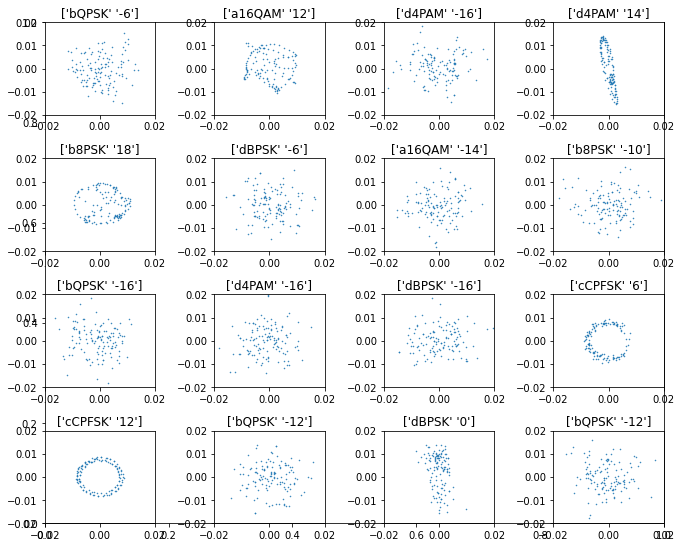

In [ ]:
#constellation diagrams
fig, ax = plt.subplots(figsize=(10,8)) 
for i in range(16):
    ax = fig.add_subplot(4,4,i+1)
    I = X_train[i][0,:]
    Q = X_train[i][1,:]
    plt.plot(I, Q, '.', markersize=1)
    plt.xlim(-0.02, 0.02)
    plt.ylim(-0.02, 0.02)
    plt.title(str(labels_train[i]))
    plt.tight_layout()
plt.show()

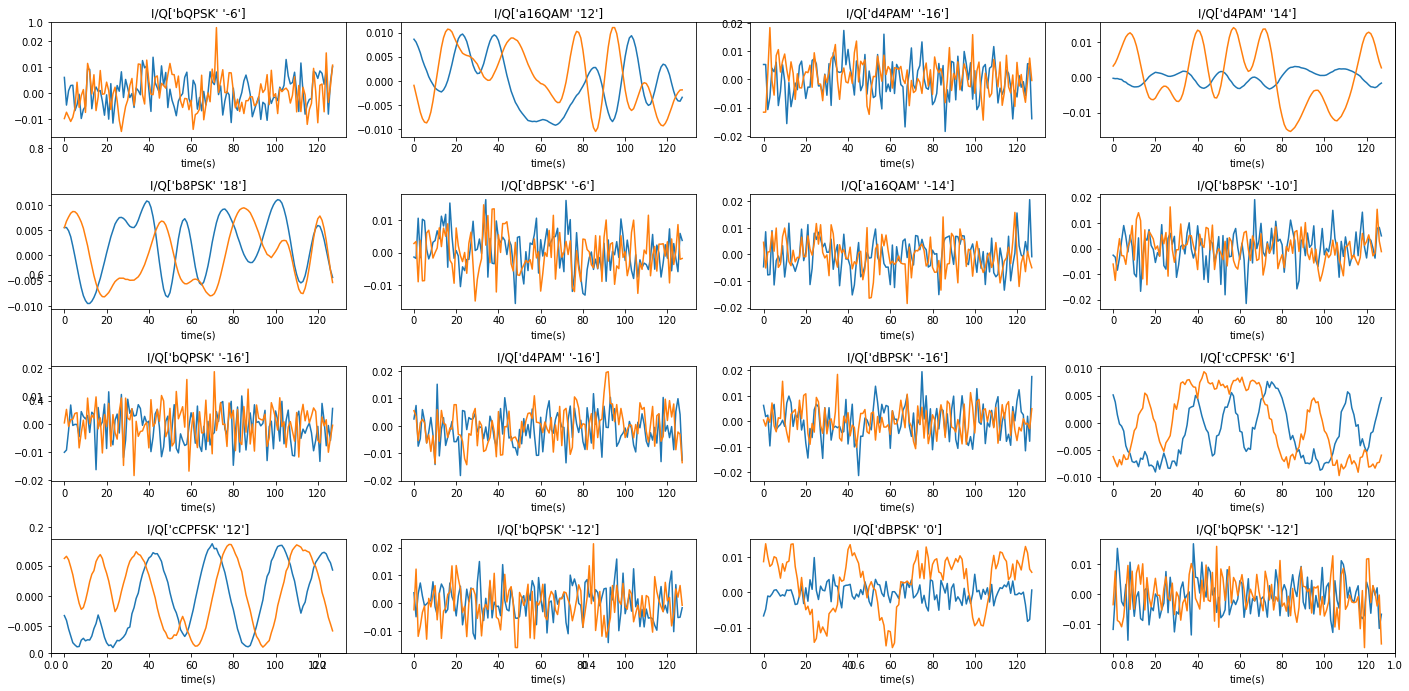

In [ ]:
#IQ time-series
fig, ax = plt.subplots(figsize=(20,10)) 
for i in range(16):
    ax = fig.add_subplot(4,4,i+1)
    I = X_train[i][0,:]
    Q = X_train[i][1,:]
    ax.set_xlabel('time(s)')
    ax.plot(I)
    ax.plot(Q)
    plt.title('I/Q' + str(labels_train[i]))
    plt.tight_layout()
plt.show()

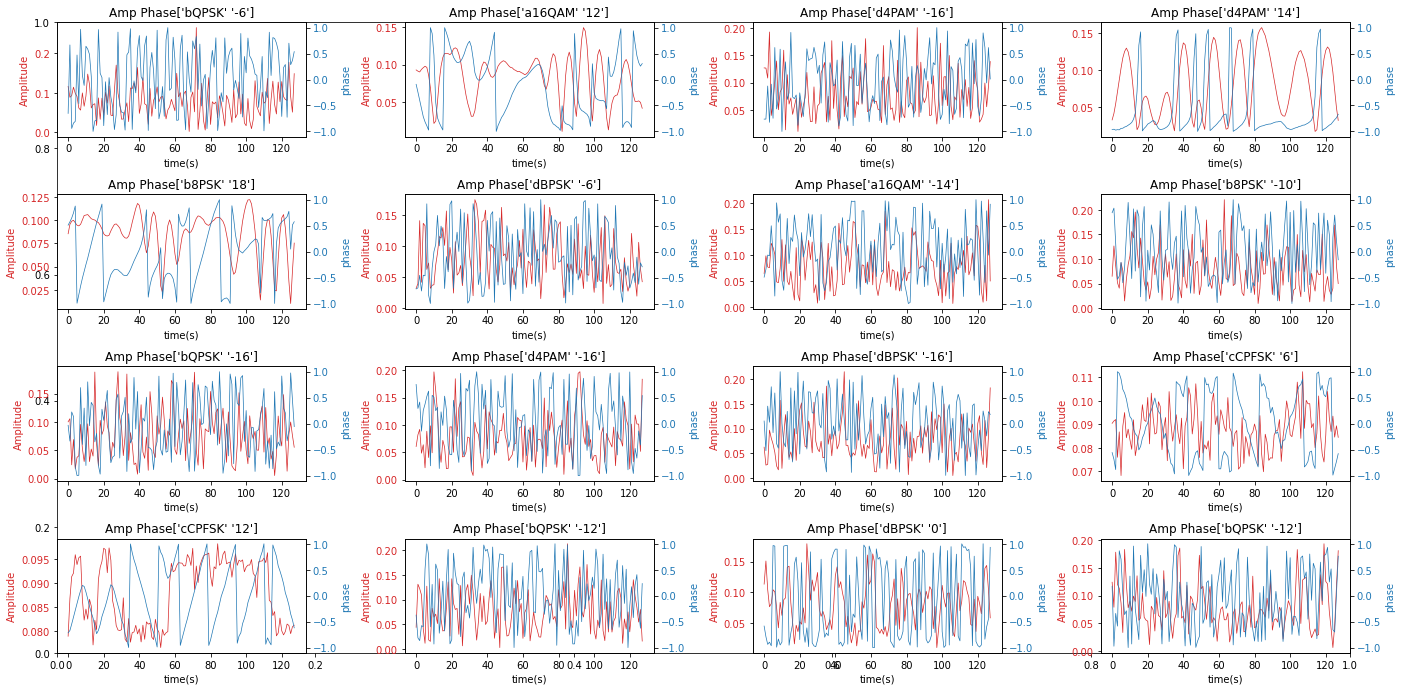

In [ ]:
#Amp-Phase time-series
fig, ax = plt.subplots(figsize=(20,10)) 
for i in range(16):
    ax = fig.add_subplot(4,4,i+1)
    amp = X_ap_train[i][0,:]
    phase = X_ap_train[i][1,:]
    ax.set_xlabel('time(s)')
    ax.set_ylabel('Amplitude',color='tab:red')
    ax.plot(amp, color='tab:red', linewidth=0.7)
    ax.tick_params(axis='y', labelcolor='tab:red')
    ax2 = ax.twinx()
    ax2.set_ylabel('phase', color='tab:blue')
    ax2.plot(phase, color='tab:blue', linewidth=0.7)
    ax2.tick_params(axis='y', labelcolor='tab:blue')
    plt.title('Amp Phase' + str(labels_train[i]))
    plt.tight_layout()
plt.show()

In [ ]:
def senet(x):
  in_channel = x.shape[-1]
  x00 = keras.layers.GlobalAveragePooling2D()(x)
  # 全局平均池化[h,w,c]==>[None,c]
  #input_plane = Input(shape=(CHANNELS+num, CHANNELS+num, 1)) 
  #input_1 = input_plane[:,:CHANNELS, :CHANNELS,:]
  #input_1= Input(shape=(CHANNELS, CHANNELS, 1)) #采用Input层来构建input_1

  x0 = x00[:, None, None, :]
  # [None,c]==>[1,1,c]
  #x = keras.layers.Reshape(target_shape=(1,1,in_channel))(x)
  #x = Input(shape=(1, 1, in_channel))
 # [1,1,c]==>[1,1,c/4]
 # x1 = keras.layers.Conv2D(filters=in_channel//4, kernel_size=1, strides=1)(x0)  # 全连接下降通道数
  x1 = keras.layers.Dense(in_channel//2)(x0)
 # relu激活
  x2 = keras.layers.Activation('relu')(x1)
 
 # [1,1,c/4]==>[1,1,c]
  x3 = keras.layers.Dense(in_channel)(x2)  # 全连接上升通道数
 
 # sigmoid激活，权重归一化
  x4 = keras.layers.Activation('sigmoid')(x3)
 
 # [h,w,c]*[1,1,c]==>[h,w,c]
  new_x = keras.layers.multiply([x, x4])  # 归一化权重和原输入特征图逐通道相乘
  return new_x

In [ ]:

def eca(inputs, b=1, gama=2):
 
 # 输入特征图的通道数
 in_channel = inputs.shape[-1]
 
 # 根据公式计算自适应卷积核大小
 kernel_size = int(abs((math.log(in_channel, 2) + b) / gama))
 
 # 如果卷积核大小是偶数，就使用它
 if kernel_size % 2:
  kernel_size = kernel_size
 
 # 如果卷积核大小是奇数就变成偶数
 else:
  kernel_size = kernel_size + 1
 
 # [h,w,c]==>[None,c] 全局平均池化
 x = keras.layers.GlobalAveragePooling2D()(inputs)
 
 # [None,c]==>[c,1]
 x = keras.layers.Reshape(target_shape=(in_channel, 1))(x)
 
 # [c,1]==>[c,1]
 x = keras.layers.Conv1D(filters=1, kernel_size=kernel_size, padding='same', use_bias=False)(x)
 
 # sigmoid激活
 x = keras.layers.Activation('sigmoid')(x)
 
 # [c,1]==>[1,1,c]
 x = keras.layers.Reshape((1,1,in_channel))(x)
 
 # 结果和输入相乘
 outputs = keras.layers.multiply([inputs, x])
 
 return outputs

In [ ]:
def build_cldnn_net(X1, X2):
  dr = 0.5  # dropout rate l

  # Reshape [N,2,128] to [N,1,2,128] on input
  input_x = Input(shape=(1, X1, X2))

  # channels_first corresponds to inputs with shape (batch, channels, height, width).
  # Build our model
  input_x_padding = ZeroPadding2D((0, 2), data_format="channels_first")(input_x)

  layer1 = Conv2D(50, (1, 8), padding='valid', activation="relu", name="conv1", kernel_initializer='glorot_uniform', data_format="channels_first")(input_x_padding)
  layer1 = Dropout(dr)(layer1)
  layer1_padding = ZeroPadding2D((0, 2), data_format="channels_first")(layer1)

  layer2 = Conv2D(50, (1, 8), padding="valid", activation="relu", name="conv2", kernel_initializer='glorot_uniform', data_format="channels_first")(layer1_padding)
  layer2 = Dropout(dr)(layer2)
  layer2 = ZeroPadding2D((0, 2), data_format="channels_first")(layer2)

  layer3 = Conv2D(50, (1, 8), padding='valid', activation="relu", name="conv3", kernel_initializer='glorot_uniform', data_format="channels_first")(layer2)
  layer3 = Dropout(dr)(layer3)

  concat = keras.layers.concatenate([layer1, layer3])
  #attention
  
  #concat = Lambda(senet)(concat1)
  #concat1 = senet(concat)
  concat1 = eca(concat)


  concat_size = list(np.shape(concat1))
  input_dim = concat_size[-1] * concat_size[-2]
  timesteps = concat_size[-3]
  concat1 = Reshape((timesteps, input_dim))(concat1)
  lstm_out = LSTM(50, input_dim=input_dim, input_length=timesteps)(concat1)#50是输出维度
  layer_dense1 = Dense(256, activation='relu', kernel_initializer='he_normal', name="dense1")(lstm_out)
  layer_dropout = Dropout(dr)(layer_dense1)
  layer_dense2 = Dense(NUM_CLASSES, kernel_initializer='he_normal', name="dense2")(layer_dropout)
  layer_softmax = Activation('softmax')(layer_dense2)

  output = Reshape([NUM_CLASSES])(layer_softmax)

  #output = Lambda(lambda output: squeeze(output, axis = [1,2]) )

  model = Model(inputs=input_x, outputs=output)

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()
  return model

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 2, 128)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 1, 2, 132)   0           ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 50, 2, 125)   450         ['zero_padding2d[0][0]']         
                                                                                                  
 dropout (Dropout)              (None, 50, 2, 125)   0           ['conv1[0][0]']                  
                                                                                              

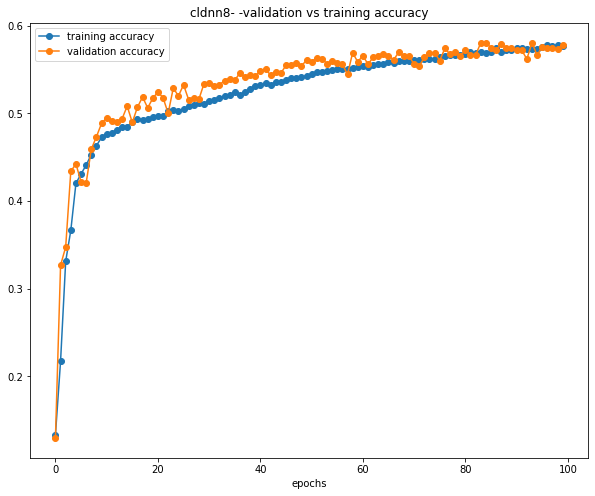

None

32/32 [==============================] - 1s 31ms/step


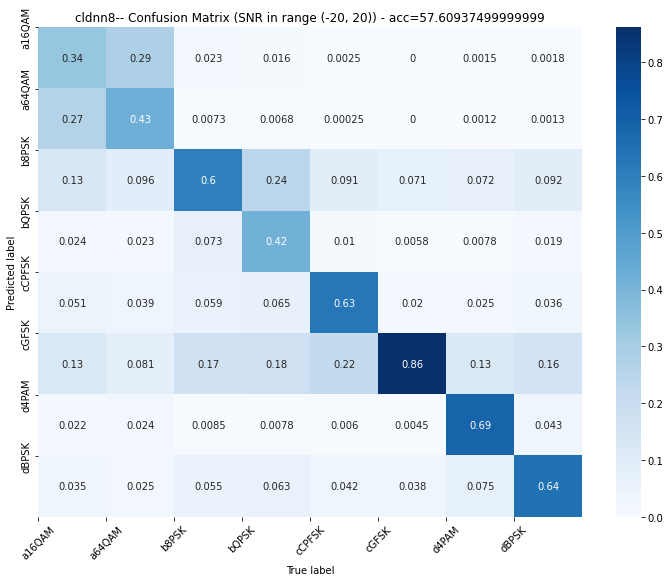

8/8 [==============================] - 0s 45ms/step


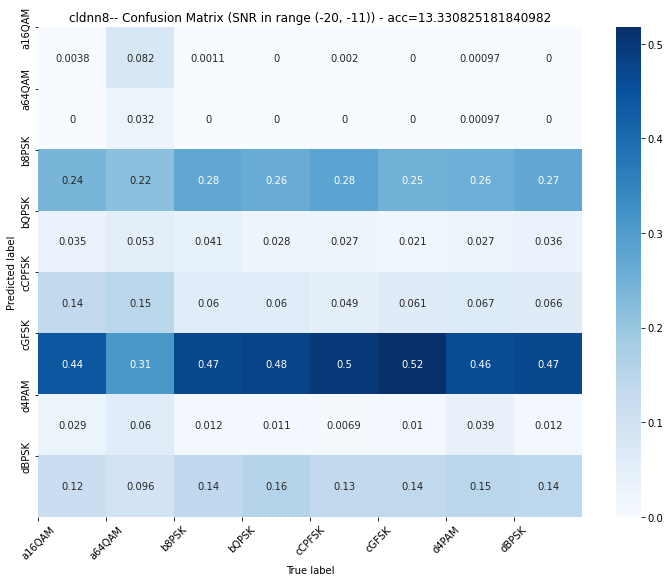

13/13 [==============================] - 1s 54ms/step


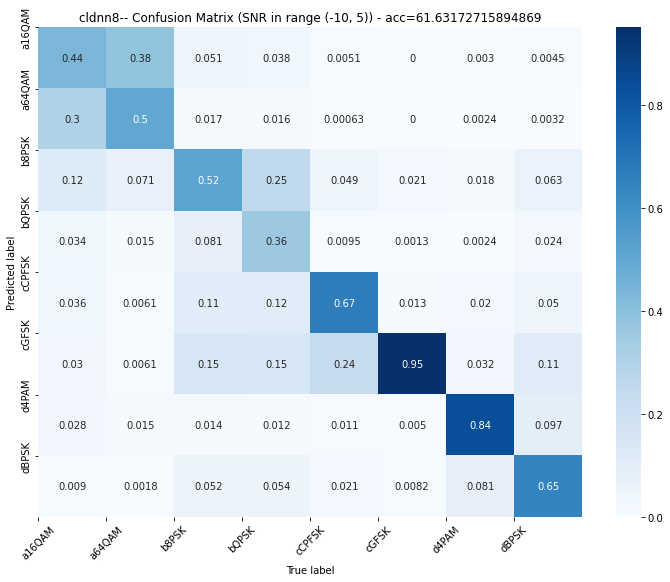

11/11 [==============================] - 0s 42ms/step


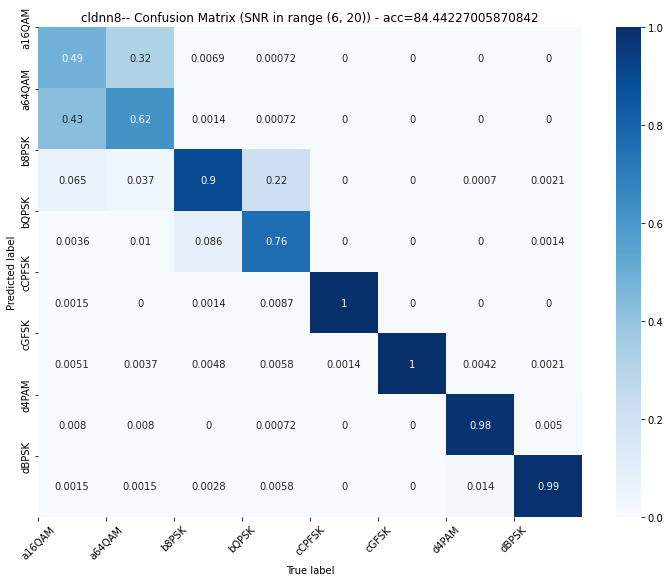

2/2 [==============================] - 0s 443ms/step


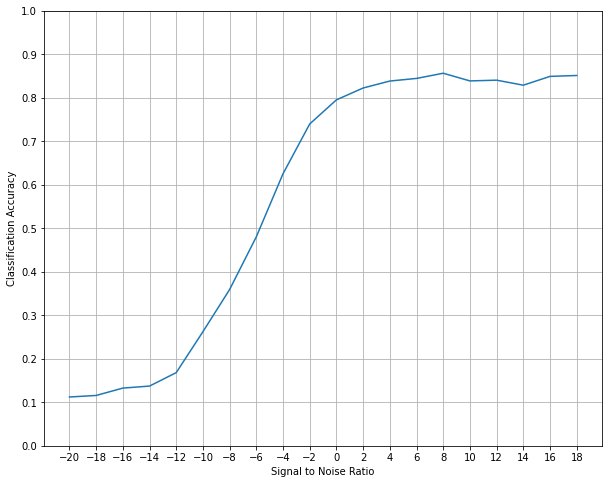

In [ ]:
#Need to reshape I/Q data from 3D into 4D to input into model
X_train2 = X_train.reshape(X_train.shape[0], 1, X_train.shape[1], X_train.shape[2])
X_val2 = X_val.reshape(X_val.shape[0], 1, X_val.shape[1], X_val.shape[2])
X_test2 = X_test.reshape(X_test.shape[0], 1, X_test.shape[1], X_test.shape[2])

cldnn_model = build_cldnn_net(X_test.shape[1], X_test.shape[2])
cldnn_model_evaluater = ModelEvaluater(cldnn_model, X_train2, y_train,X_val2, y_val, X_test2, y_test, labels_test, BATCH_SIZE, 'cldnn8-' )
cldnn_model_evaluater.fit(EPOCHS, patience=PATIENCE)
cldnn_model_evaluater.print_summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1, 2, 128)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 1, 2, 132)   0           ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 50, 2, 125)   450         ['zero_padding2d[0][0]']         
                                                                                                  
 dropout (Dropout)              (None, 50, 2, 125)   0           ['conv1[0][0]']                  
                                                                                              

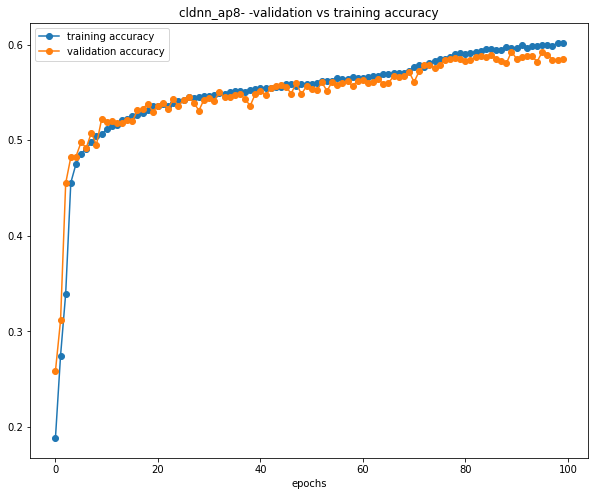

None

32/32 [==============================] - 1s 28ms/step


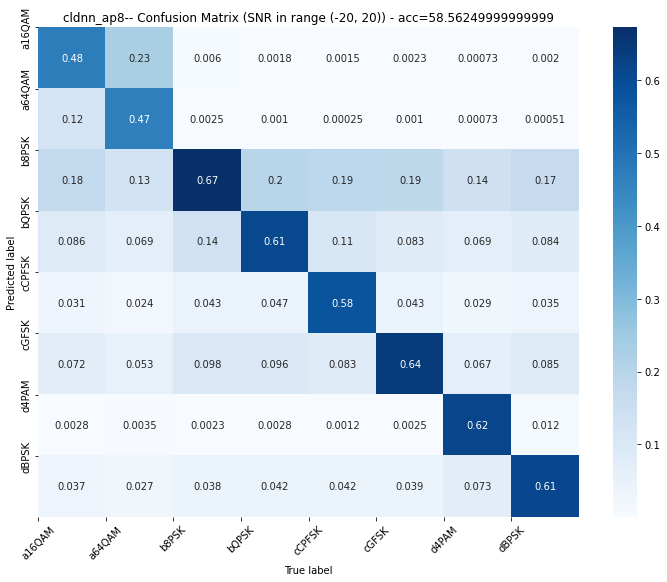

8/8 [==============================] - 0s 44ms/step


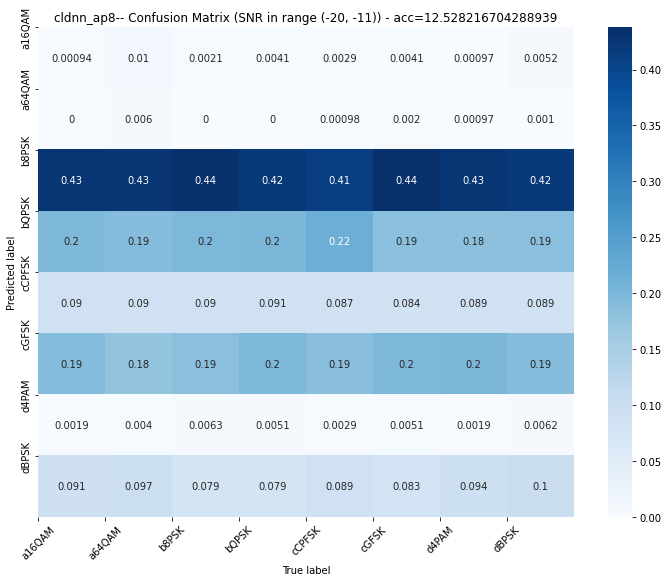

13/13 [==============================] - 1s 52ms/step


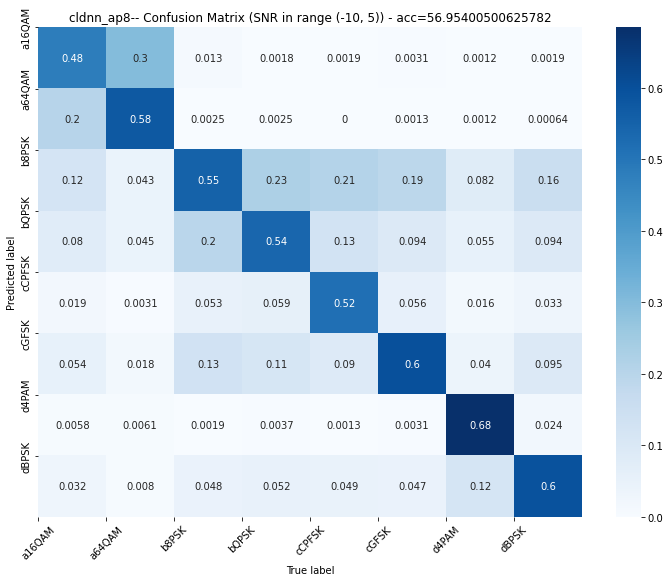

11/11 [==============================] - 0s 40ms/step


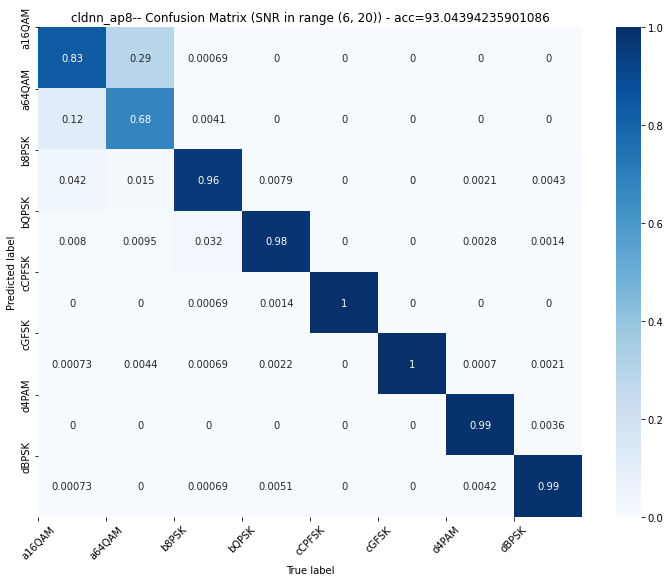

2/2 [==============================] - 0s 410ms/step


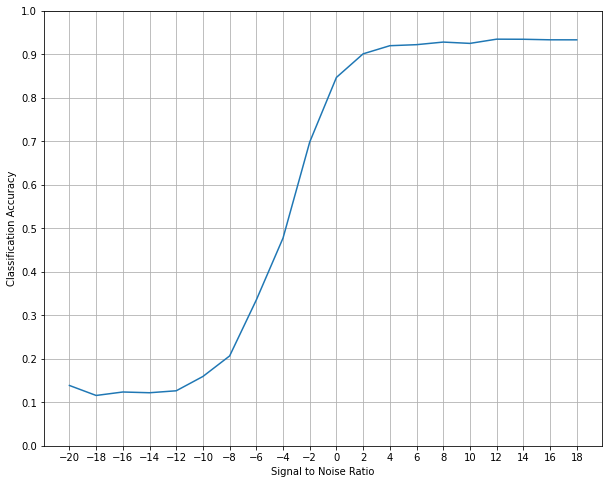

In [ ]:
#Need to reshape I/Q data from 3D into 4D to input into model
X_ap_train2 = X_ap_train.reshape(X_ap_train.shape[0], 1, X_ap_train.shape[1], X_ap_train.shape[2])
X_ap_val2 = X_ap_val.reshape(X_ap_val.shape[0], 1, X_ap_val.shape[1], X_ap_val.shape[2])
X_ap_test2 = X_ap_test.reshape(X_ap_test.shape[0], 1, X_ap_test.shape[1], X_ap_test.shape[2])

cldnn_ap_model = build_cldnn_net(X_ap_test.shape[1], X_ap_test.shape[2])
cldnn_ap_model_evaluater = ModelEvaluater(cldnn_ap_model, X_ap_train2, y_train, X_ap_val2, y_val, X_ap_test2, y_test, labels_test, BATCH_SIZE, 'cldnn_ap8-' )
cldnn_ap_model_evaluater.fit(EPOCHS, patience=PATIENCE)
cldnn_ap_model_evaluater.print_summary()

In [ ]:
X1 = X_test.shape[1]
X2 = X_test.shape[2]

In [ ]:
dr = 0.5  # dropout rate l

  # Reshape [N,2,128] to [N,1,2,128] on input
input_x = Input(shape=(1, X1, X2))

  # channels_first corresponds to inputs with shape (batch, channels, height, width).
  # Build our model
input_x_padding = ZeroPadding2D((0, 2), data_format="channels_first")(input_x)

layer1 = Conv2D(50, (1, 8), padding='valid', activation="relu", name="conv1", init='glorot_uniform', data_format="channels_first")(input_x_padding)
layer1 = Dropout(dr)(layer1)
layer1_padding = ZeroPadding2D((0, 2), data_format="channels_first")(layer1)

layer2 = Conv2D(50, (1, 8), padding="valid", activation="relu", name="conv2", init='glorot_uniform', data_format="channels_first")(layer1_padding)
layer2 = Dropout(dr)(layer2)
layer2 = ZeroPadding2D((0, 2), data_format="channels_first")(layer2)

layer3 = Conv2D(50, (1, 8), padding='valid', activation="relu", name="conv3", init='glorot_uniform', data_format="channels_first")(layer2)
layer3 = Dropout(dr)(layer3)

concat = keras.layers.concatenate([layer1, layer3])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, (1, 8), padding="valid", activation="relu", name="conv1", data_format="channels_first", kernel_initializer="glorot_uniform")`
  # Remove the CWD from sys.path while we load stuff.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, (1, 8), padding="valid", activation="relu", name="conv2", data_format="channels_first", kernel_initializer="glorot_uniform")`
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, (1, 8), padding="valid", activation="relu", name="conv3", data_format="channels_first", kernel_initializer="glorot_uniform")`


In [ ]:
in_channel = int(concat.shape[-1])

In [ ]:
x = keras.layers.GlobalAveragePooling2D(data_format="channels_first")(concat)

In [ ]:
x = keras.layers.Dense(in_channel//4)(x)

In [ ]:
x = Activation('relu')(x)

In [ ]:
x = keras.layers.Dense(in_channel)(x)

In [ ]:
x = Activation('sigmoid')(x)

In [ ]:
concat = keras.layers.multiply([concat, x])

In [ ]:
concat_size = list(np.shape(concat))

In [ ]:
input_dim = int(concat_size[-1] * concat_size[-2])
timesteps = int(concat_size[-3])
concat = Reshape((timesteps, input_dim))(concat)
lstm_out = LSTM(50, input_dim=input_dim, input_length=timesteps)(concat)
layer_dense1 = Dense(256, activation='relu', init='he_normal', name="dense1")(lstm_out)
layer_dropout = Dropout(dr)(layer_dense1)
layer_dense2 = Dense(NUM_CLASSES, init='he_normal', name="dense2")(layer_dropout)
layer_softmax = Activation('softmax')(layer_dense2)
output = Reshape([NUM_CLASSES])(layer_softmax)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(50, input_shape=(50, 488))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, activation="relu", name="dense1", kernel_initializer="he_normal")`
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, name="dense2", kernel_initializer="he_normal")`
  import sys


In [ ]:
model = Model(inputs=input_x, outputs=output)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1, 2, 128)    0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 1, 2, 132)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 50, 2, 125)   450         zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 50, 2, 125)   0           conv1[0][0]                      
____________________________________________________________________________________________

In [ ]:
def build_cldnn_net(X1, X2):
  dr = 0.5  # dropout rate l

  # Reshape [N,2,128] to [N,1,2,128] on input
  input_x = Input(shape=(1, X1, X2))

  # channels_first corresponds to inputs with shape (batch, channels, height, width).
  # Build our model
  input_x_padding = ZeroPadding2D((0, 2), data_format="channels_first")(input_x)

  layer1 = Conv2D(50, (1, 8), padding='valid', activation="relu", name="conv1", init='glorot_uniform', data_format="channels_first")(input_x_padding)
  layer1 = Dropout(dr)(layer1)
  layer1_padding = ZeroPadding2D((0, 2), data_format="channels_first")(layer1)

  layer2 = Conv2D(50, (1, 8), padding="valid", activation="relu", name="conv2", init='glorot_uniform', data_format="channels_first")(layer1_padding)
  layer2 = Dropout(dr)(layer2)
  layer2 = ZeroPadding2D((0, 2), data_format="channels_first")(layer2)

  layer3 = Conv2D(50, (1, 8), padding='valid', activation="relu", name="conv3", init='glorot_uniform', data_format="channels_first")(layer2)
  layer3 = Dropout(dr)(layer3)

  concat1 = keras.layers.concatenate([layer1, layer3])
  #attention
  
  in_channel = int(concat1.shape[-1])
  x = keras.layers.GlobalAveragePooling2D()(concat1)
 # 全局平均池化[h,w,c]==>[None,c]

  x = x[:, None, None, :]
 # [None,c]==>[1,1,c]
#x = keras.layers.Reshape(target_shape=(1,1,in_channel))(x)
 
 # [1,1,c]==>[1,1,c/4]
  x = keras.layers.Conv2D(filters=in_channel//4, kernel_size=1, strides=1)(x)  # 全连接下降通道数
 
 # relu激活
  x = keras.layers.Activation('relu')(x)
 
 # [1,1,c/4]==>[1,1,c]
  x = keras.layers.Dense(in_channel)(x)  # 全连接上升通道数
 
 # sigmoid激活，权重归一化
  x = keras.layers.Activation('sigmoid')(x)
 
 # [h,w,c]*[1,1,c]==>[h,w,c]
  concat = keras.layers.multiply([concat1, x])  # 归一化权重和原输入特征图逐通道相乘





  concat_size = list(np.shape(concat))
  input_dim = int(concat_size[-1] * concat_size[-2])
  timesteps = int(concat_size[-3])
  concat = Reshape((timesteps, input_dim))(concat)
  lstm_out = LSTM(50, input_dim=input_dim, input_length=timesteps)(concat)
  layer_dense1 = Dense(256, activation='relu', init='he_normal', name="dense1")(lstm_out)
  layer_dropout = Dropout(dr)(layer_dense1)
  layer_dense2 = Dense(NUM_CLASSES, init='he_normal', name="dense2")(layer_dropout)
  layer_softmax = Activation('softmax')(layer_dense2)

  output = Reshape([NUM_CLASSES])(layer_softmax)
  model = Model(inputs=input_x, outputs=output)

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()
  return model